In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
#Load the file into pandas
df = pd.read_csv("/Users/williamng/Library/CloudStorage/OneDrive-UNIVERSITYUTARAMALAYSIA/UUM SEM 4 Y2/SKIH2103 - DATA ANALYTICS/Assignment2/online_retail.csv")

#check fo the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#size of dataset
df.shape

(541909, 8)

In [5]:
#check for the null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Drop all rows with a null value
df.dropna(inplace=True)
len(df)

406829

In [7]:
#Convert the InvoiceNo column to string
df["InvoiceNo"] = df["InvoiceNo"].astype('str')

In [8]:
#Remove rows with invoices that contain a "C"
df = df[~df["InvoiceNo"].str.contains("C")]

len(df)

397924

In [9]:
#Check the distribution of transactions per country
top10 = df["Country"].value_counts().head(10)
print(top10)

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: Country, dtype: int64


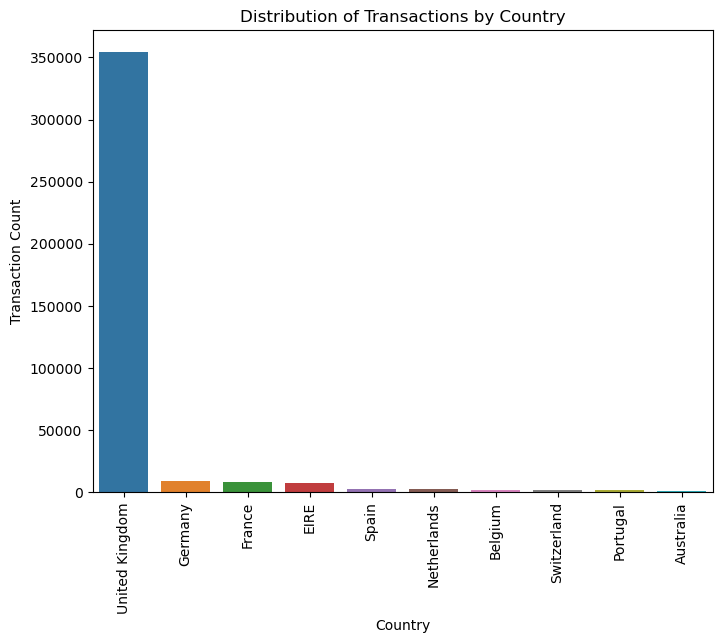

In [10]:
plt.figure(figsize=[8, 6])
sns.countplot(x='Country',data=df, order=top10.index)
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.title('Distribution of Transactions by Country')
plt.xticks(rotation=90)
plt.show()

In [11]:
#use highest transaction 'uk'and groupby column
marketBasket = df[df['Country'] =="United Kingdom"]\
                .groupby(['InvoiceNo', 'Description'])['Quantity']

In [12]:
marketBasket = marketBasket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
marketBasket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50 S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#hot encode data
encode_values = lambda x: 0 if x <= 0 else 1
basket_encoded = marketBasket.applymap(encode_values)
basket_encoded

Description,4 PURPLE FLOCK DINNER CANDLES,50 S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#filter for only invoices with 2 or more items
basket_filtered = basket_encoded[basket_encoded.apply(lambda row: row.sum() >= 2, axis=1)]

basket_filtered

Description,4 PURPLE FLOCK DINNER CANDLES,50 S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df = df.astype(bool)

In [16]:
#Generate the frequent itemsets
itemsets = apriori(basket_filtered, 
            min_support=0.025, use_colnames=True).sort_values("support",ascending=False)
itemsets

/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
140,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
63,0.093197,(JUMBO BAG RED RETROSPOT)
113,0.090466,(REGENCY CAKESTAND 3 TIER)
9,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
99,0.082986,(PARTY BUNTING)
...,...,...
30,0.025689,(FELTCRAFT CUSHION OWL)
162,0.025559,"(LUNCH BAG BLACK SKULL., LUNCH BAG SUKI DESIGN )"
44,0.025429,(HANGING HEART ZINC T-LIGHT HOLDER)
161,0.025299,"(LUNCH BAG SPACEBOY DESIGN , LUNCH BAG BLACK ..."


In [17]:
rules = association_rules(itemsets, metric="lift", 
        min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.039802,0.031803,0.026275,0.660131,20.756994,0.025009,2.848734,0.991279
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031803,0.039802,0.026275,0.826176,20.756994,0.025009,5.523961,0.983088
2,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952,0.986881
3,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452,0.982670
4,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.040713,0.048192,0.029787,0.731629,15.181557,0.027825,3.546618,0.973776
5,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.048192,0.040713,0.029787,0.618084,15.181557,0.027825,2.511773,0.981428
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.049298,0.044550,0.029527,0.598945,13.444339,0.027330,2.382339,0.973616
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.044550,0.049298,0.029527,0.662774,13.444339,0.027330,2.819182,0.968778
8,(PAPER CHAIN KIT 50 S CHRISTMAS ),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.061004,0.043770,0.028421,0.465885,10.644050,0.025751,1.790308,0.964915
9,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50 S CHRISTMAS ),0.043770,0.061004,0.028421,0.649331,10.644050,0.025751,2.677730,0.947523


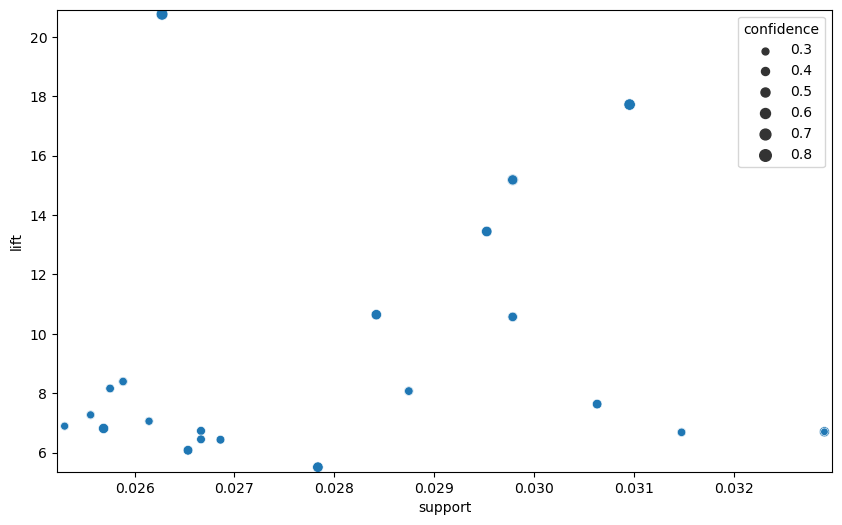

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "lift", size = "confidence", data = rules)
plt.margins(0.01,0.01)
plt.show()

In [19]:
itemsets[itemsets['support'] >= 0.03]


,support,itemsets
140,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
63,0.093197,(JUMBO BAG RED RETROSPOT)
113,0.090466,(REGENCY CAKESTAND 3 TIER)
9,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
99,0.082986,(PARTY BUNTING)
...,...,...
26,0.030697,(DOORMAT UNION FLAG)
165,0.030632,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA..."
123,0.030502,(SET OF 3 HEART COOKIE CUTTERS)
21,0.030372,(DOLLY GIRL LUNCH BOX)


In [20]:
rules[(rules['lift'] >=10) & (rules['confidence'] >=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.039802,0.031803,0.026275,0.660131,20.756994,0.025009,2.848734,0.991279
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031803,0.039802,0.026275,0.826176,20.756994,0.025009,5.523961,0.983088
2,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952,0.986881
3,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452,0.982670
4,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.040713,0.048192,0.029787,0.731629,15.181557,0.027825,3.546618,0.973776
5,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.048192,0.040713,0.029787,0.618084,15.181557,0.027825,2.511773,0.981428
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.049298,0.044550,0.029527,0.598945,13.444339,0.027330,2.382339,0.973616
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.044550,0.049298,0.029527,0.662774,13.444339,0.027330,2.819182,0.968778
9,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50 S CHRISTMAS ),0.043770,0.061004,0.028421,0.649331,10.644050,0.025751,2.677730,0.947523
10,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.050858,0.055411,0.029787,0.585678,10.569696,0.026969,2.279841,0.953904
